In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
np.random.seed(42)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

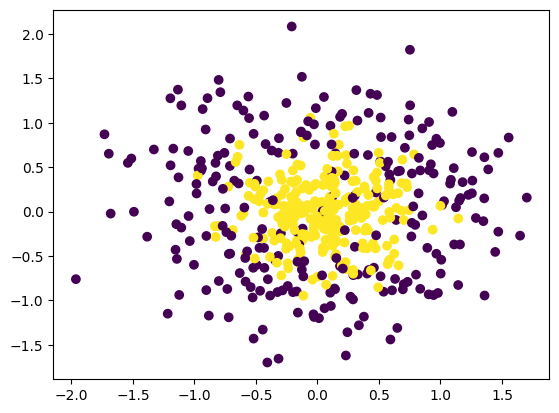

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc=AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring="accuracy",cv=10))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAM

0.786

In [6]:
abc.fit(X,y)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [7]:
X

array([[-9.32386218e-02,  2.99041641e-01],
       [ 4.15898414e-01,  1.11023783e+00],
       [ 9.87505098e-02,  5.43766155e-02],
       [-3.18616104e-01, -4.98557102e-01],
       [-6.01736430e-01,  1.13675809e+00],
       [-9.36913945e-03, -1.40794778e-01],
       [ 5.63275761e-02,  3.92660379e-01],
       [-8.24184824e-01,  3.96353598e-01],
       [-3.71931480e-01,  6.86631947e-01],
       [-1.59861466e-01, -5.38689457e-01],
       [ 1.01313173e+00,  7.37618759e-02],
       [ 5.93211139e-01, -1.43861447e+00],
       [ 4.73069369e-01, -4.13685114e-01],
       [-9.47820332e-01,  5.68898692e-01],
       [ 5.83452928e-01, -3.99362660e-03],
       [ 9.05925986e-02, -9.64564692e-02],
       [ 6.76839485e-02, -1.89591342e-01],
       [ 7.46729013e-01,  8.57657068e-01],
       [ 5.78621809e-01, -5.56450745e-01],
       [ 4.96253827e-01,  1.11034838e-01],
       [-3.18586578e-02, -2.16572208e-01],
       [ 4.62739163e-01,  5.77154123e-02],
       [-4.64025929e-01,  1.95529072e-01],
       [ 3.

<Axes: >

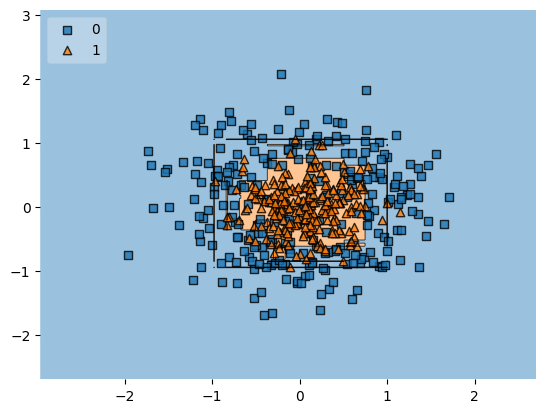

In [8]:
plot_decision_regions(X,y,clf=abc,legend=2)

In [9]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    X_range=np.linspace(X.min(),X.max(),100)
    xx1,xx2=np.meshgrid(X_range,X_range)
    y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat=y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap="viridis",alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

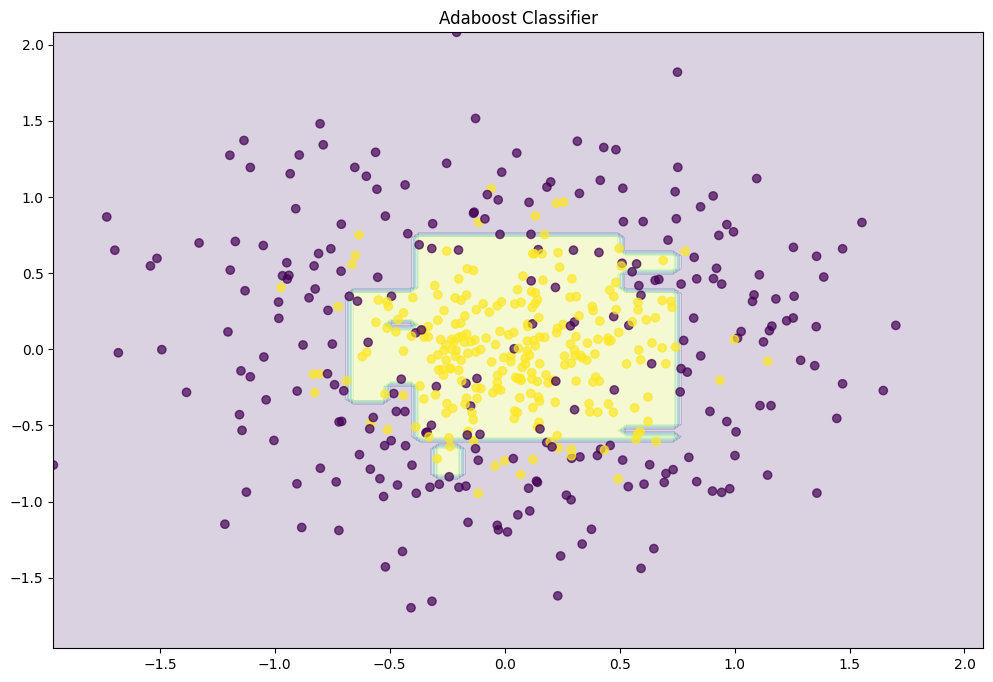

In [10]:
plot_decision_boundary(abc)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


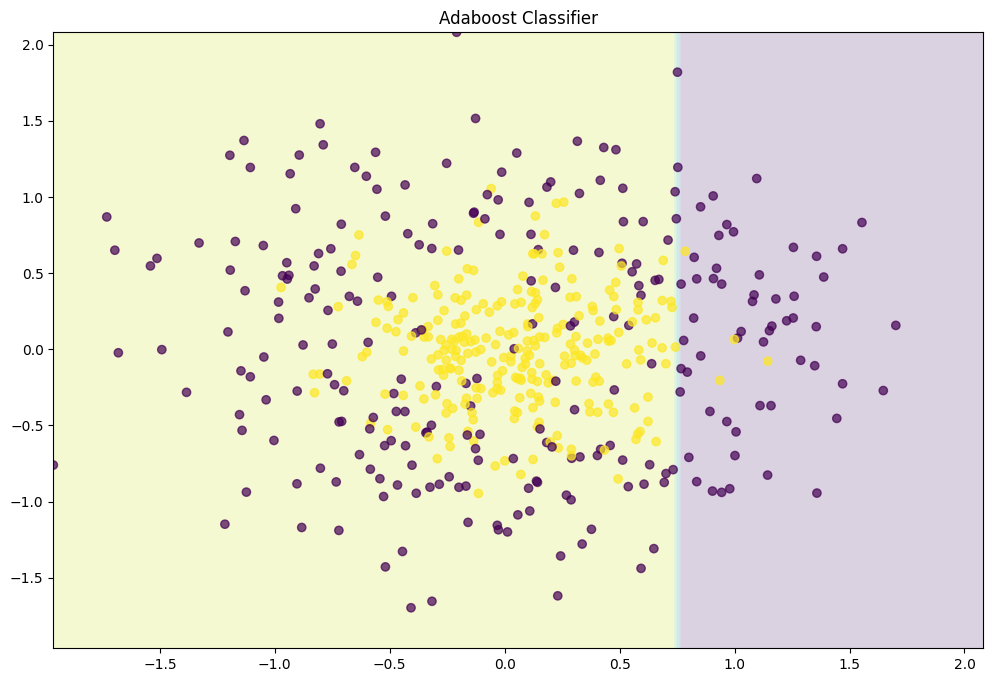

In [11]:
abc=AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


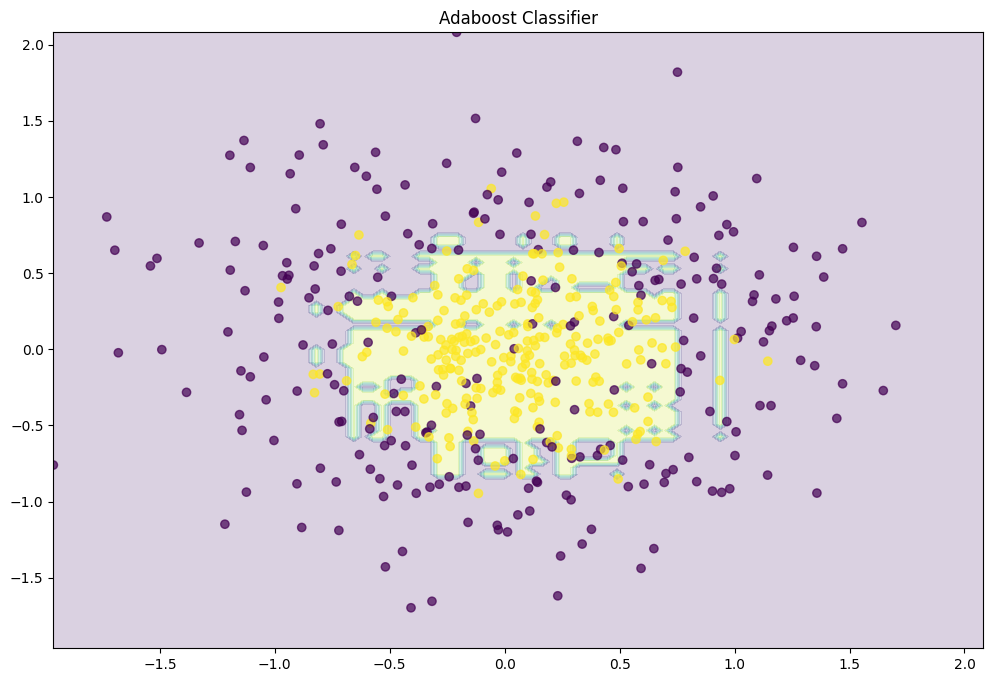

In [12]:
abc=AdaBoostClassifier(n_estimators=500)
abc.fit(X,y)
plot_decision_boundary(abc)

In [13]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid["n_estimators"]=[10,50,100,200,400,500]
grid["learning_rate"]=[0.0001,0.001,0.01,0.1,0.9999]
grid["algorithm"]=["SAMME","SAMME.R"]

grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring="accuracy")
grid_result=grid_search.fit(X,y)


In [16]:
grid_result.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}

In [17]:
grid_result.best_score_

0.8320000000000001